# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75 </p>
## <p style="text-align: center;">Due: **10th September 2020(09/10/2020)** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*


# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

# Question 2: Guess the coin (5+5 points)

Assume we are playing a guessing game with a friend. The friend has two coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.9 being head (H)

The friend secretly picked one of the coins, randomly threw it a few times, and get a sequence of *HHHHTT* (all of which come from the same coin he picked). We need to guess which coin your friend picked.

1. Which quantitive tool/concept will you use to determine which coin was likely used? Briefly explain. (5 points)
2. Compute the likelihood of coin A and coin B. Which has a higher likelihood? (5 points)


# Question 3: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

Sample 20000 points to obtain the contour plots for both the  cases.

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (8 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

def Gaussian_Distribution(N = 2, M = 20000, m = 0):
    
    mean = np.zeros(N) + m
    cov_1 = np.array([[16, 0], [0, 9]])
    cov_2 = np.array([[16, 6], [6, 9]])
    
    data_1 = np.random.multivariate_normal(mean, cov_1, M)
    data_2 = np.random.multivariate_normal(mean, cov_2, M)
    
    Gaussian_1 = multivariate_normal(mean = mean, cov = cov_1)
    Gaussian_2 = multivariate_normal(mean = mean, cov = cov_2)
    
    return Gaussian_1, data_1, Gaussian_2, data_2

Gaussian_1, data_1, Gaussian_2, data_2 = Gaussian_Distribution()

Text(0.5, 1.0, 'Contour Plot for Case 2')

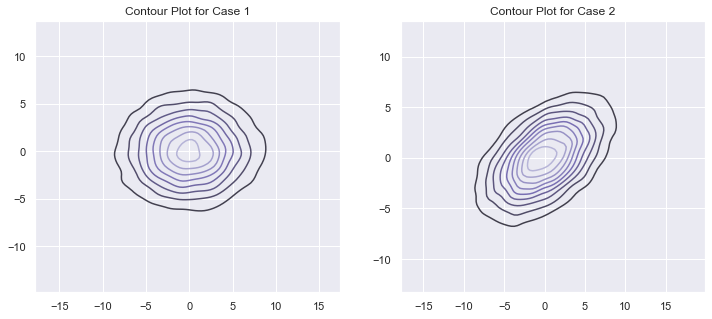

In [30]:
plt.figure(1, figsize = (12, 5))
ax_1 = plt.subplot(1, 2, 1)
x_1, y_1 = data_1.T
ax_1 = sns.kdeplot(x_1, y_1, cmap="Purples_d")
ax_1.set_title('Contour Plot for Case 1')

ax_2 = plt.subplot(1, 2, 2)
x_2, y_2 = data_2.T
ax_2 = sns.kdeplot(x_2, y_2, cmap="Purples_d")
ax_2.set_title('Contour Plot for Case 2')

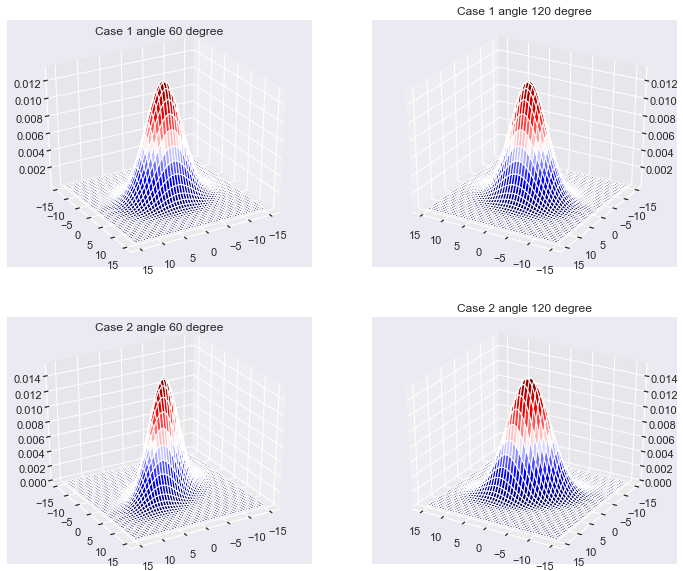

In [31]:
M = 142
fig = plt.figure(2, figsize = (12, 10))
ax_11 = fig.add_subplot(221, projection='3d')
ax_12 = fig.add_subplot(222, projection='3d')
X_1, Y_1 = np.meshgrid(np.linspace(-15, 15, M), np.linspace(-15, 15, M))
d = np.dstack([X_1, Y_1])
Z_1 = Gaussian_1.pdf(d).reshape(M, M)
ax_11.plot_surface(X_1, Y_1, Z_1, rstride=3, cstride=3, cmap='seismic')
ax_11.view_init(30, 60)
ax_11.set_title('Case 1 angle 60 degree')
plt.draw()
ax_12.plot_surface(X_1, Y_1, Z_1, rstride=3, cstride=3, cmap='seismic')
ax_12.view_init(30, 120)
ax_12.set_title('Case 1 angle 120 degree')
plt.draw()

ax_21 = fig.add_subplot(223, projection='3d')
ax_22 = fig.add_subplot(224, projection='3d')
X_2, Y_2 = np.meshgrid(np.linspace(-15, 15, M), np.linspace(-15, 15, M))
d = np.dstack([X_2, Y_2])
Z_2 = Gaussian_2.pdf(d).reshape(M, M)
ax_21.plot_surface(X_2, Y_2, Z_2, rstride=3, cstride=3, cmap='seismic')
ax_21.view_init(30, 60)
ax_21.set_title('Case 2 angle 60 degree')
plt.draw()
ax_22.plot_surface(X_2, Y_2, Z_2, rstride=3, cstride=3, cmap='seismic')
ax_22.view_init(30, 120)
ax_22.set_title('Case 2 angle 120 degree')
plt.draw()

In [ ]:
cos = 

# Question 4 (5 pts)
(i)What are the key assumptions regarding the relation between the dependent variable (Y) and the
independent variables (Xs) made in the standard (multiple) linear regression model?

(ii) Briefly describe how the residuals obtained from an MLR solution can be used to test some
assumption(s) made by this model.


# Question 5: Multiple Linear Regression (30 pts)

The data given in "data.csv" is loaded into a data frame. Here, the columns are
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)

df = df.fillna(0)

X = df.drop(['Weight'], axis=1)
y = df['Weight']


Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

f. (5 pts) Identify and list the the five most siginificant features. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

In [11]:
print(df.shape)
print(df.head())

(159, 6)
         Weight  Length1  Length2  Length3   Height   Width
Species                                                    
Bream     242.0     23.2     25.4     30.0  11.5200  4.0200
Bream     290.0     24.0     26.3     31.2  12.4800  4.3056
Bream     340.0     23.9     26.5     31.1  12.3778  4.6961
Bream     363.0     26.3     29.0     33.5  12.7300  4.4555
Bream     430.0     26.5     29.0     34.0  12.4440  5.1340
